In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

/home/cslab/.virtualenvs/py36env/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


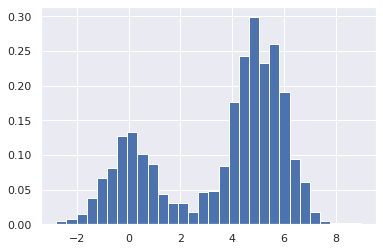

In [3]:
hist = plt.hist(x, bins=30, normed=True)

In [4]:
x = make_data(20)
bins = np.linspace(-5, 10, 10)

/home/cslab/.virtualenvs/py36env/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


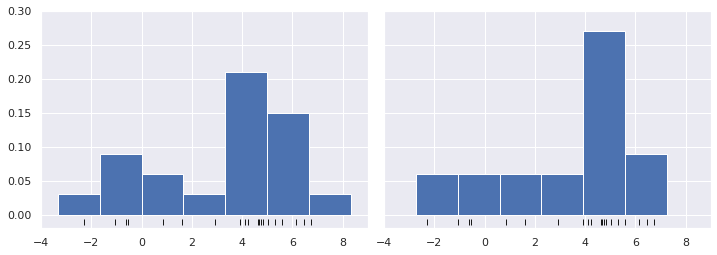

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                       sharex=True, sharey=True,
                       subplot_kw={'xlim':(-4, 9),
                                   'ylim':(-0.02, 0.3)})
fig.subplots_adjust(wspace=0.05)
for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins=bins + offset, normed=True)
    ax[i].plot(x, np.full_like(x, -0.01), '|k',
               markeredgewidth=1)

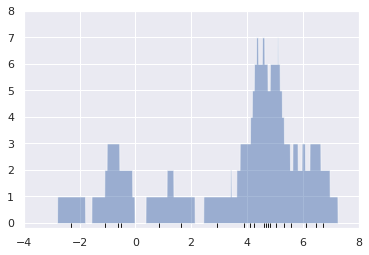

In [9]:
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.5) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 8, -0.2, 8]);

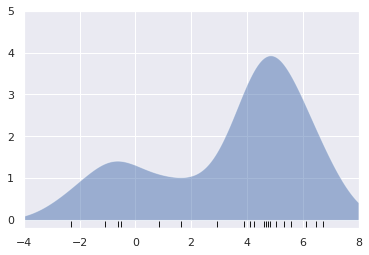

In [7]:
from scipy.stats import norm
x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 8, -0.2, 5]);

(-0.02, 0.22)

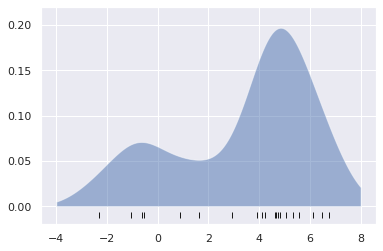

In [10]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)


In [ ]:
## dataframe -> np.array
scored_train_values = scored_train.values
plt.hist(scored_train_values, 50, normed=True)

In [ ]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

## For KDE process
def kde_sklearn(x, bandwidth=0.2, **kwargs):
    x_grid = np.linspace(x.min() - 1, x.max() + 1, 500)
    """Kernel Density Estimation with Scikit-learn"""
    # instantiate and fit the KDE model
    kde_skl = KernelDensity(kernel='gaussian', bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x.reshape((-1, 1)))
    # score_samples() returns the log-likelihood of the samples (log of the probability density)
    # kde.score_samples(X)返回的是點x對應概率的log值，要使用exp求指數還原。
    log_pdf = kde_skl.score_samples(x_grid.reshape((-1, 1)))
    return np.exp(log_pdf), x_grid

In [ ]:
## Test KDE
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

def kde_sklearn_selecting(x, **kwargs):
    # use grid search cross-validation to optimize the bandwidth
    params = {'bandwidth': 10**np.linspace(-1, 1, 100)}
#     my_cv = LeaveOneOut()
    # do the KDE with Gaussian kernel with cross validation
    grid = GridSearchCV(KernelDensity(kernel='gaussian'), params, cv=20)
    grid.fit(x.reshape((-1, 1)))
    # find the choice of bandwidth which maximizes the score (which in this case defaults to the log-likelihood):

    # use the best estimator to compute the kernel density estimate
    kde_gauss=grid.best_estimator_
    print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))
    
    values = np.linspace(scored_train_values.min()-1 , scored_train_values.max()+1 , len(scored_train_values))
    values = values.reshape((-1, 1))
    probabilities = kde_gauss.score_samples(values)
    probabilities = np.exp(probabilities)
    
#     score_pred = kde_gauss.score_samples(x.reshape((-1, 1)))
#     return score_pred
    return values, probabilities

#     pdf = np.exp(kde_gauss.score_samples(x_grid[:, None]))
    
# KDEscore= np.exp(kde_sklearn_selecting(scored_train_values))

# x_grid = np.linspace(scored_train_values.min() - 1, scored_train_values.max() + 1, len(scored_train_values))

values, probabilities= kde_sklearn_selecting(scored_train_values)

fig, ax = plt.subplots(figsize=(16, 9), dpi=80)
# ax.hist(scored_train_values, 30, fc='gray', histtype='stepfilled', alpha=0.5, normed=True)
# ax.plot(x_grid, KDEscore, label='KDE')
# ax.set_xlim(-0.2, 0.5)
ax.hist(scored_train_values, bins=50, density=True)
ax.plot(values[:], probabilities)

ax.legend(loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
#Plot KDE
fig, ax2 = plt.subplots(figsize = (15,10))
# pdf, x_grid = kde_sklearn(scored_train_values, bandwidth = 0.5)
pdf2, x_grid2 = kde_sklearn(scored_train_values, bandwidth = 0.1)
# pdf3, x_grid3 = kde_sklearn(scored_train_values, bandwidth = 0.9)

# ax2.plot(x_grid, pdf, alpha = 0.9, color = 'green', linewidth = 2.0)
ax2.plot(x_grid2, pdf2, alpha = 0.9, color = 'red', linewidth = 2.0)
# ax2.plot(x_grid3, pdf3, alpha = 0.9, color = 'yellow', linewidth = 2.0)
plt.show()

In [ ]:
# # https://github.com/rahul2992/outlier_kde/blob/master/medicare_script.py
# from sklearn.neighbors import KernelDensity

# def kde_sklearn(x, bandwidth=0.2, **kwargs):
#     x_grid = np.linspace(x.min() - 1, x.max() + 1, 500)
#     """Kernel Density Estimation with Scikit-learn"""
#     kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
#     kde_skl.fit(x[:, np.newaxis])
#     # score_samples() returns the log-likelihood of the samples
#     log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
#     return np.exp(log_pdf), x_grid

In [ ]:
plt.fill_between(x_grid2, pdf2, alpha=0.5)
plt.plot(scored_train_values, np.full_like(scored_train_values, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 4)